Regressions are a supervised model that predicts numbers based on infinitely many known inputs and outputs.  Regressions use the known inputs and outputs to identify variable coefficients for the function that will define the predictive model.

Regressions use the following equation:  Ax=B, where:

* A:  Design Matrix [n x m]
* x:  Coefficient Vector [m x 1]
* B:  Prediction Vector [n x 1]


Regression Model Terminology:

* Training Set: Data used to train a model

* f = model

* x = input variable, aka feature

* y = output variabnle, aka target

        (x, y) = single training example

        (x^i, y^i) = i-th training example (a specific data row in the data set) - NOT an exponent!

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def get_linear_regression_matrices(x, y):

    A = [[1, val] for val in x]
    B = [[val] for val in y]

    return A, B

Matrix A defines the design matrix.  

Matrix B defines the prediction matrix

Vector x is the coefficient vector and can be solved for:

* Ax = B

* A^T*Ax = A^T*B

* (A^TA)^-1*(A^T*Ax) = (A^TA)^-1*(A^T*B)

* x = (A^TA)^-1*(A^T*B)

In [39]:
def get_coefficient_vector(A, B):

    A_t = np.transpose(A)
    A_tA =A_t@A
    A_tB = A_t@B

    coeff_vector = np.linalg.inv(A_tA)@A_tB

    return coeff_vector

https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf
https://www.youtube.com/watch?v=Qa_FI92_qo8

@ is used in Python for matrix multiplication

Coding note:  pass measured and calculated values as ordered pairs (x, y) to avoid calculation errors

In [40]:
def get_prediction_vector(A, B, coeff_vector):

    Y_Calc = A@coeff_vector

    return Y_Calc

Cost function, also known as squared error, is denoted by J and measures how big the square errors are in a model given its parameters, w.  The ideal value w minimizes J(w).
This can be visualized with 2D or 3D plots, where J(w) is the dependent variable and the parameters are the independent variables
The Gradient Descent algorithm is designed the optimize a model's parameters

In [41]:
def get_cost_function(Y_, Y_Calc):
    
    errors = Y_Calc-Y_

    squared_errors = [err**2 for err in errors]
    sum_squared_errors = sum(squared_errors)
    J = (1/len(Y_))*sum_squared_errors

    return J

In [42]:
def plot_regression(x, y, Y_Calc, r2=None):
    
    #  this produces a 2-D plot of the train data and test data
    plot, ax = plt.subplots()

    ax.scatter(x, y, s=10)
    ax.plot(x, Y_Calc, 'r')
    ax.grid(True)
    
    if r2:
        ax.set_title(f'R2: {r2}')

    plt.show()

In [43]:
x_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_data = [6, 9.5, 13, 15, 16.5 , 17.8, 18.5, 19 ,19.2 ,19.7 ,19.8]

In [44]:
def main(x, y):
    
    A, B = get_linear_regression_matrices(x, y)
    coeff_vector = get_coefficient_vector(A, B)
    Y_Calc = get_prediction_vector(A, B, coeff_vector)
    J = get_cost_function(B, Y_Calc)

    plot_regression(x, y, Y_Calc, J)

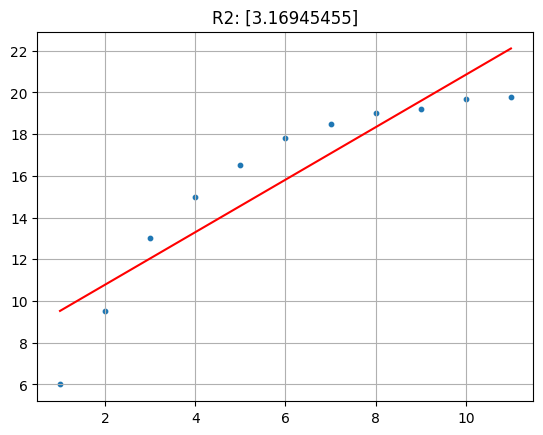

In [45]:
main(x_data, y_data)

In [46]:
def get_quadratic_regression_matrices(x, y):
    
    A = [[val**2, val, 1] for val in x]
    B = [[val] for val in y]

    return A, B

In [47]:
def main(x, y):
    
    A, B = get_quadratic_regression_matrices(x, y)
    coeff_vector = get_coefficient_vector(A, B)
    Y_Calc = get_prediction_vector(A, B, coeff_vector)
    J = get_cost_function(B, Y_Calc)

    plot_regression(x, y, Y_Calc, J)

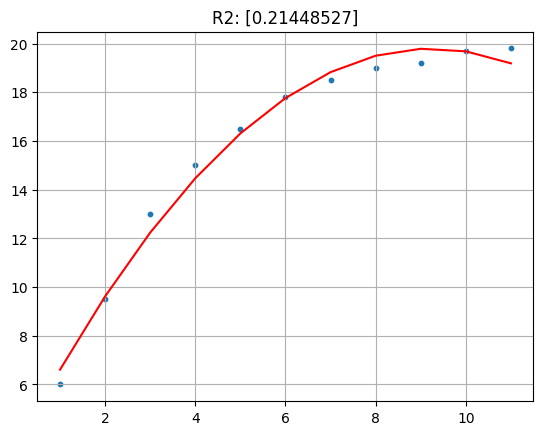

In [48]:
main(x_data, y_data)

In [49]:
def get_cubic_regression_matrices(x, y):
    
    A = [[val**3, val**2, val, 1] for val in x]
    B = [[val] for val in y]

    return A, B

In [50]:
def main(x, y):
    
    A, B = get_cubic_regression_matrices(x, y)
    coeff_vector = get_coefficient_vector(A, B)
    Y_Calc = get_prediction_vector(A, B, coeff_vector)
    J = get_cost_function(B, Y_Calc)

    plot_regression(x, y, Y_Calc, J)

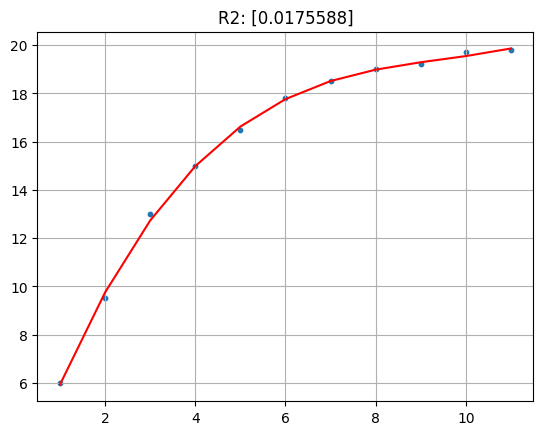

In [51]:
main(x_data, y_data)

In [52]:
def get_fourth_order_regression_matrices(x, y):
    
    A = [[val**4, val**3, val**2, val, 1] for val in x]
    B = [[val] for val in y]

    return A, B

In [53]:
def main(x, y):
    
    A, B = get_fourth_order_regression_matrices(x, y)
    coeff_vector = get_coefficient_vector(A, B)
    Y_Calc = get_prediction_vector(A, B, coeff_vector)
    J = get_cost_function(B, Y_Calc)

    plot_regression(x, y, Y_Calc, J)

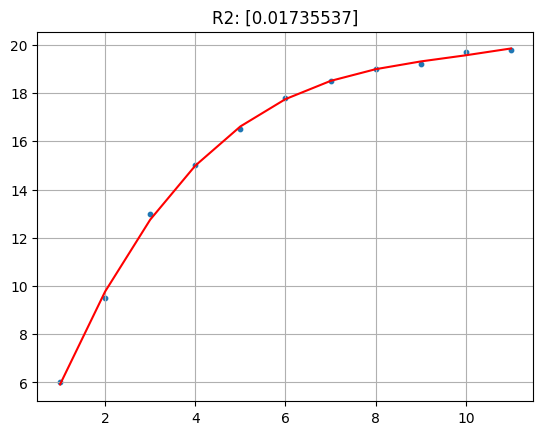

In [54]:
main(x_data, y_data)

In [55]:
def get_nth_order_regression_matrices(x, y, n_order):

    #  format X_ matrix to the defined function order
    def get_row(val):
        row = [val**idx for idx in range(n_order+1)]
        row.reverse()

        return row


    A = [[*get_row(val)] for val in x]
    B = [[val] for val in y]

    return A, B

In [56]:
def main(x, y, n_order):
    
    A, B = get_nth_order_regression_matrices(x, y, n_order)
    coeff_vector = get_coefficient_vector(A, B)
    Y_Calc = get_prediction_vector(A, B, coeff_vector)
    J = get_cost_function(B, Y_Calc)

    plot_regression(x, y, Y_Calc, J)

ORDER: 0


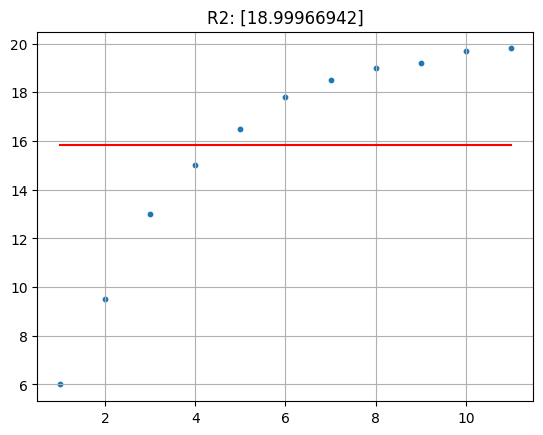

ORDER: 1


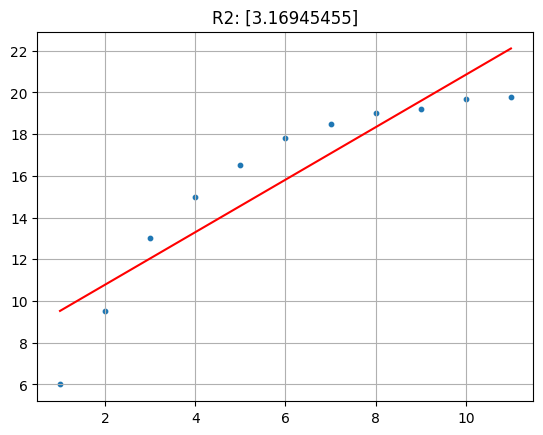

ORDER: 2


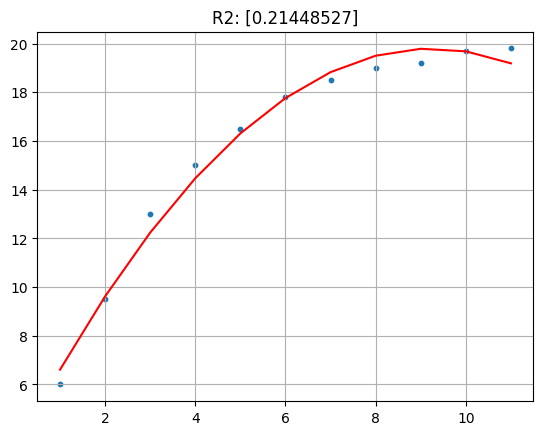

ORDER: 3


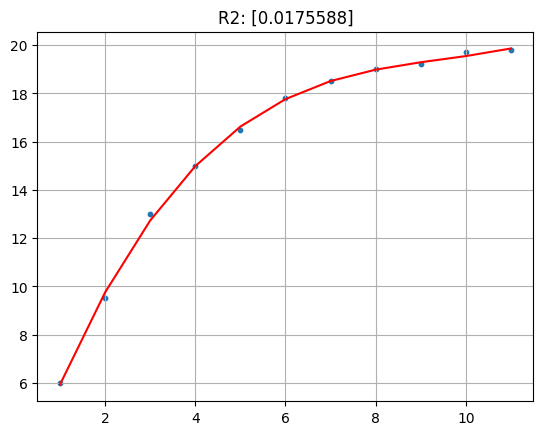

ORDER: 4


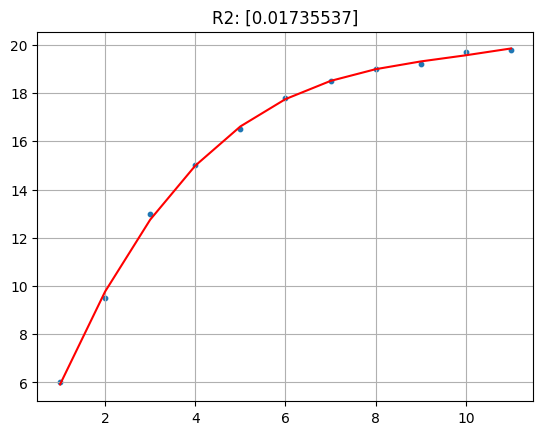

ORDER: 5


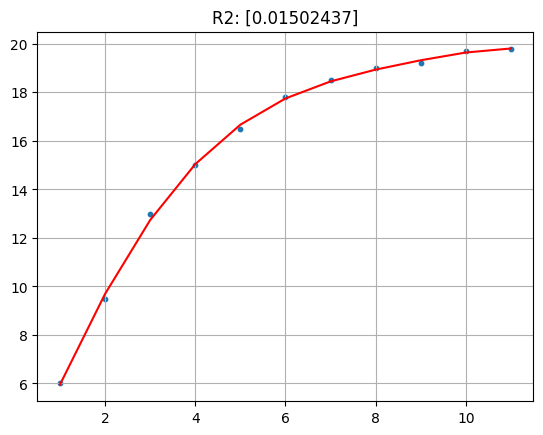

ORDER: 6


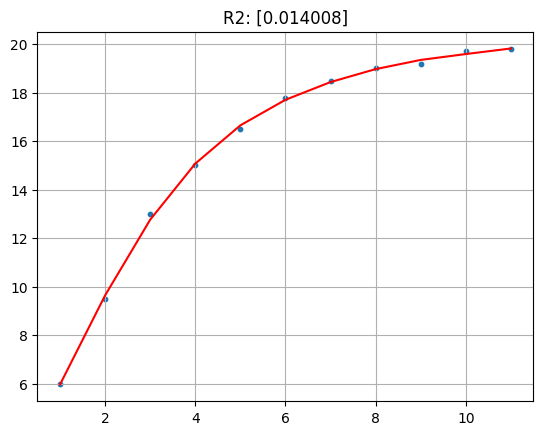

ORDER: 7


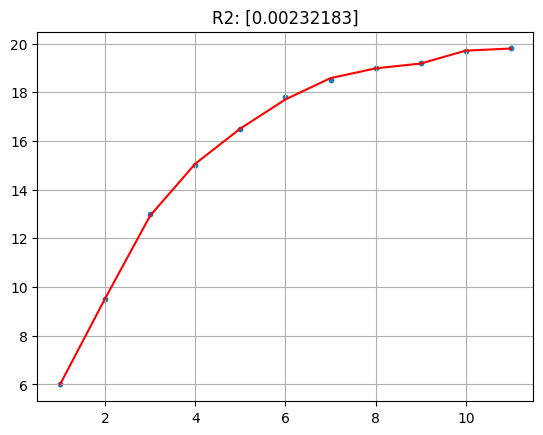

ORDER: 8


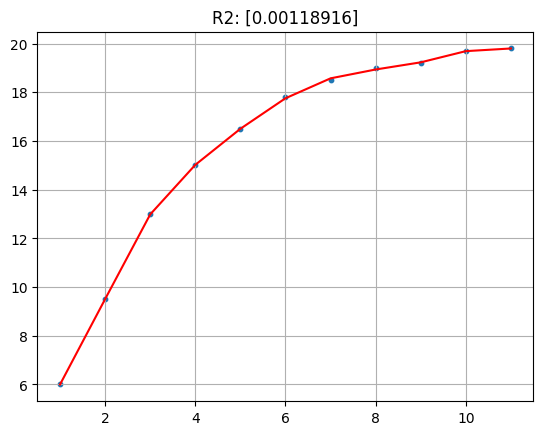

ORDER: 9


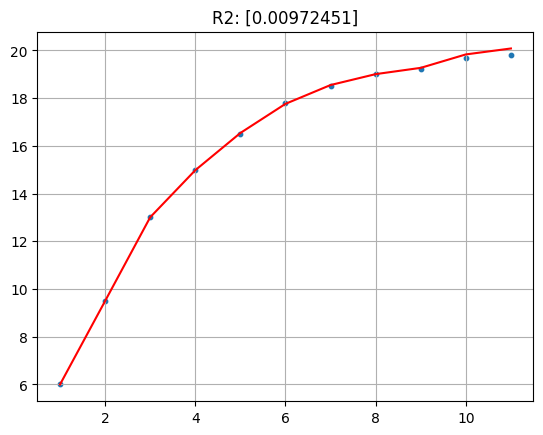

ORDER: 10


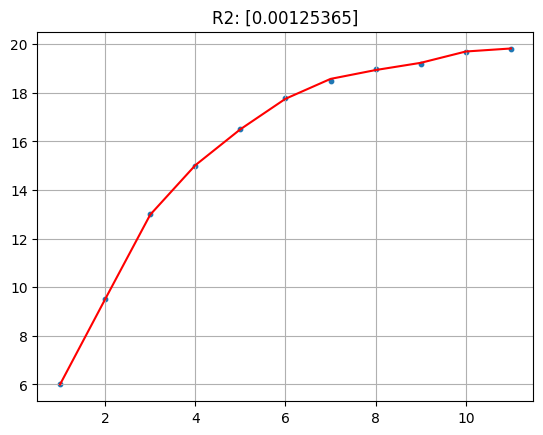

ORDER: 11


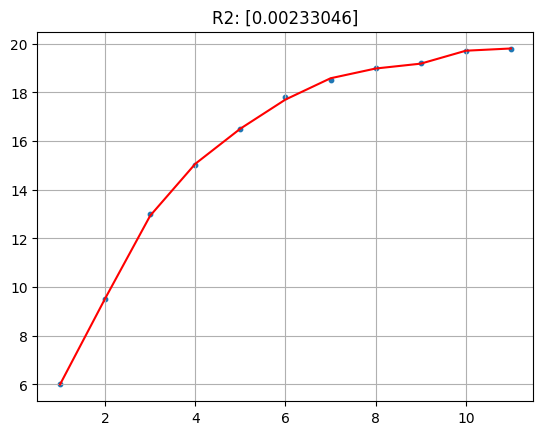

ORDER: 12


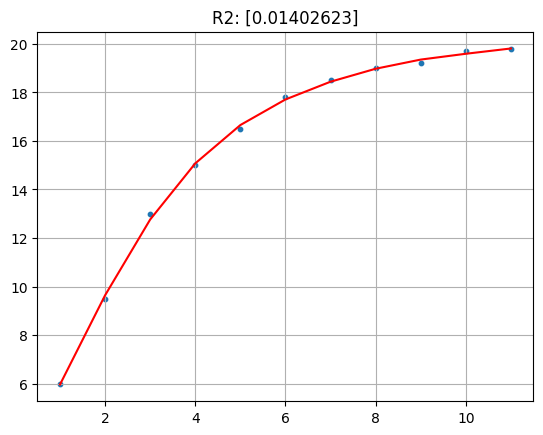

ORDER: 13


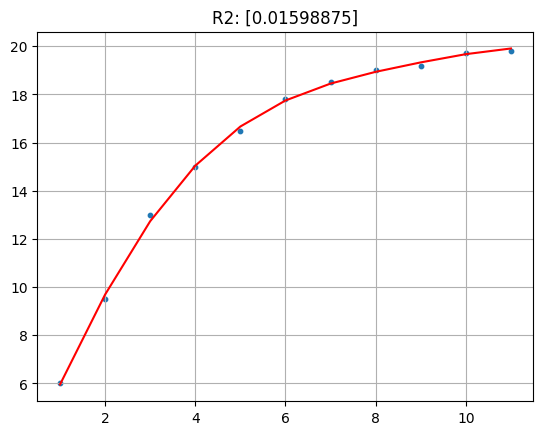

ORDER: 14


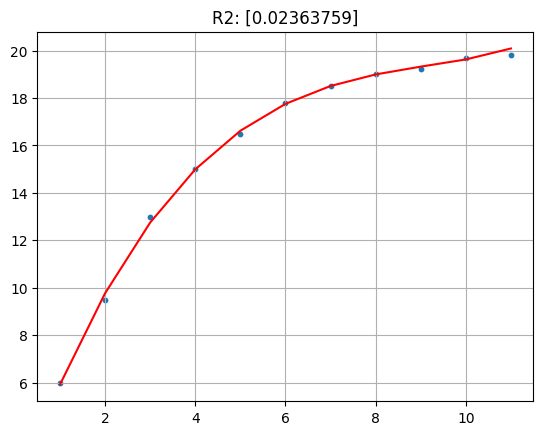

ORDER: 15


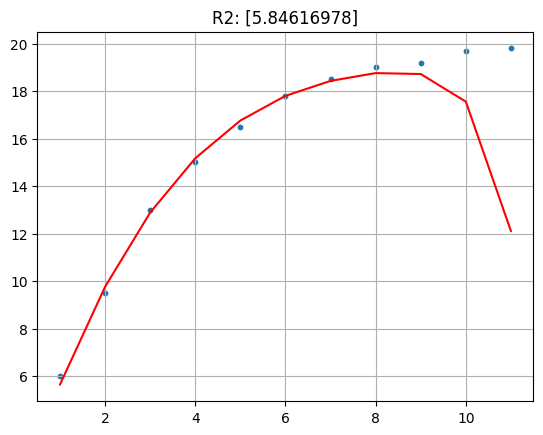

ORDER: 16


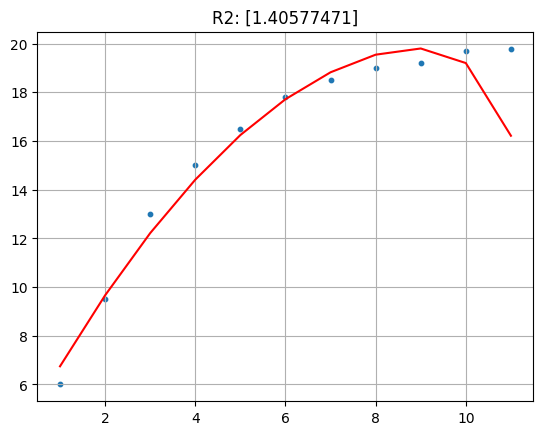

ORDER: 17


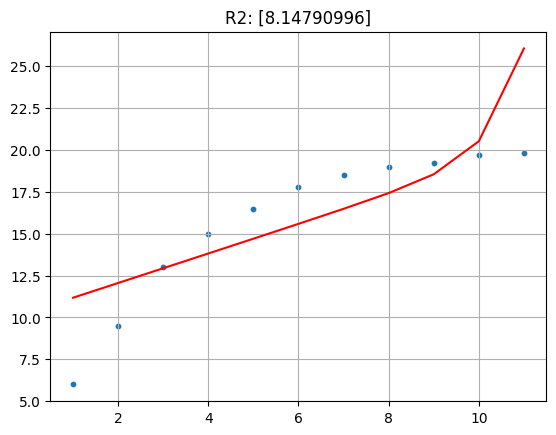

ORDER: 18


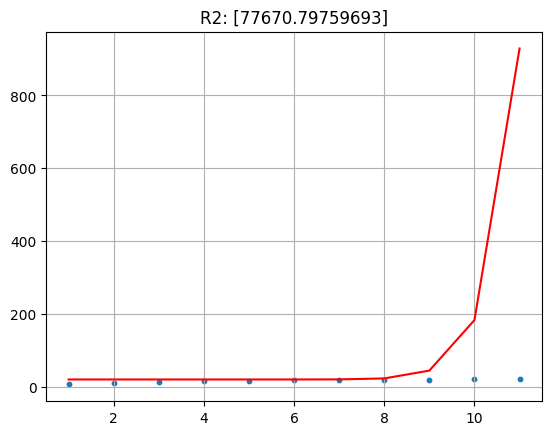

In [57]:
order = 18
for i in range(order+1):
    print(f'ORDER: {i}')
    main(x_data, y_data, n_order=i)

Of course, the dataset does not represent a linear trend, so a linear model won't fit the data properly.  Notice that the R2 decreases (i.e. the model better fits the data) as we change the function's order (leading exponent) to better match the dataset.  There isn't enough data to properly capture this regression, but I wanted to illustrate how the matrices can be constructed to capture different data trends.

-----

Let's generate some linear data now and apply the functions we wrote above to perform a linear regression.

In [58]:
np.random.seed(seed=1)
x_data = np.random.uniform(low=0.0, high=10.0, size=(1000,))
slope = 0.36
intercept = -2.85

y_data = slope*x_data+np.random.normal(loc=0.0, scale=1.0, size=(1000,))+intercept

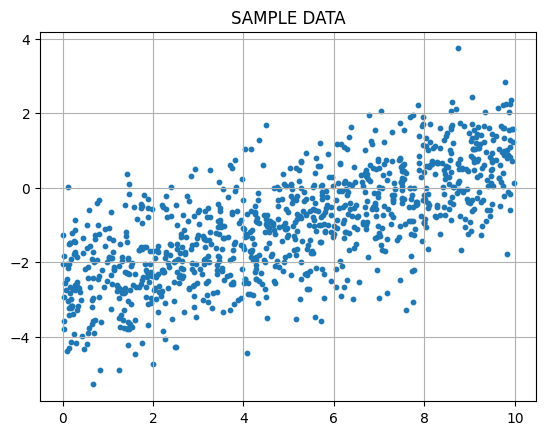

In [59]:
fig, ax = plt.subplots()

ax.scatter(x_data, y_data, s=10)
ax.set_title('SAMPLE DATA')
ax.grid(True)
plt.show()

In [60]:
def main(x, y):
    
    A, B = get_linear_regression_matrices(x, y)
    coeff_vector = get_coefficient_vector(A, B)
    Y_Calc = get_prediction_vector(A, B, coeff_vector)
    J = get_cost_function(B, Y_Calc)

    plot_regression(x, y, Y_Calc, J)

    print(coeff_vector)

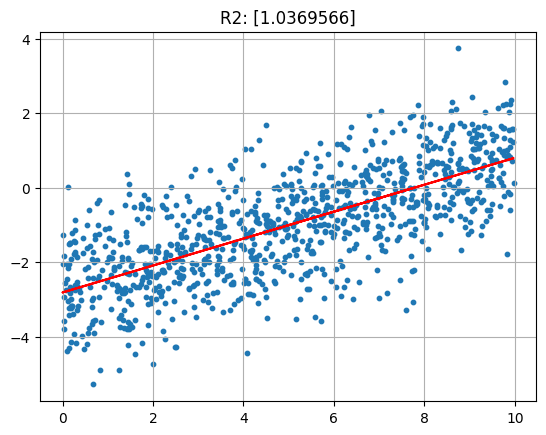

[[-2.80800219]
 [ 0.36106337]]


In [61]:
main(x_data, y_data)

The linear model identified:
* Slope = 0.361
* y-intercept = -2.808

-------------

LINEAR REGRESSION WITH SKLEARN

https://www.youtube.com/watch?v=b0L47BeklTE

In [62]:
from pydataset import data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [63]:
#  split the existing data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data)

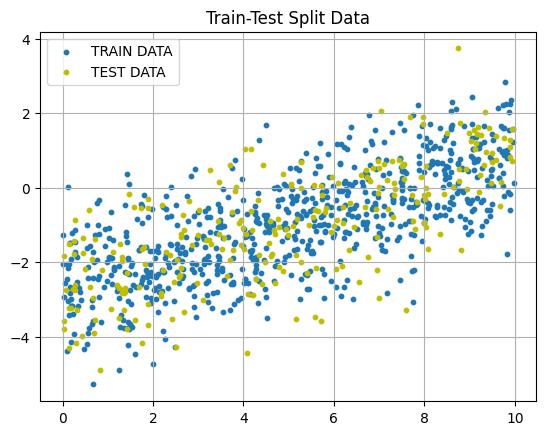

In [64]:
plot, ax = plt.subplots()

ax.scatter(X_train, y_train, s=10, label='TRAIN DATA')
ax.scatter(X_test, y_test, s=10, c='y', label='TEST DATA')
ax.grid(True)
ax.legend()
ax.set_title('Train-Test Split Data')

plt.show()

In [65]:
#  train data must be 2-dimensional for LinearRegression().fit()
xx_train = [[i] for i in X_train]
yy_train = [[j] for j in y_train]

xx_test = [[i] for i in X_test]
yy_test = [[j] for j in y_test]

In [66]:
#  TEACH THE MODEL:  train the model with the training data by identifying the relationship between the input features and target value
lr = LinearRegression()
lr.fit(xx_train,yy_train)

LinearRegression()

In [67]:
#  USE THE MODEL:  use the linear model to estimate target values with the test parameters
prediction = lr.predict(xx_test)

Text(0.5, 1.0, 'Train-Test Split Data')

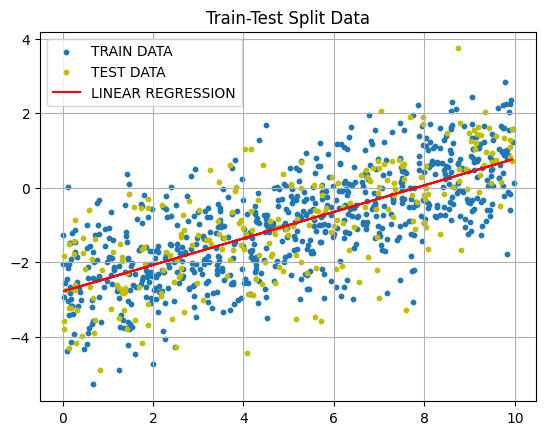

In [68]:
plot, ax = plt.subplots()

ax.scatter(X_train, y_train, s=10, label='TRAIN DATA')
ax.scatter(X_test, y_test, s=10, c='y', label='TEST DATA')
ax.plot(X_test, prediction,'r', label='LINEAR REGRESSION')
ax.grid(True)
ax.legend()
ax.set_title('Train-Test Split Data')

In [69]:
#  use the linear regression model to produce a slope (coef) and intercept value for the linear model
print(lr.coef_)  # slope
print(lr.intercept_)  # intercept

[[0.35579127]]
[-2.78122837]


The linear model identified:
* Slope = 0.356
* y-intercept = -2.781

In [70]:
#  use the linear regression model to predict the output value at some input value
prediction_point = 7.2
predicted_value = lr.predict([[prediction_point]])[0]

prediction_point, predicted_value

(7.2, array([-0.21953121]))

Measure the coefficient of determination (R^2) to determine how well the model fits the data
This measures the proportion of variance in the target variable (0 to 1, where 1 is a perfect fit; negative value means that the model fits worse than baseline model that predicts the mean of the target variable)

In [71]:
lr.score(xx_test, yy_test)

0.5073626298203369

Note that the data set is VERY limited in this example, so there's notable model score variance between runs.  However, the procedure for training a regression model holds:

* Identify train data
* Identify test data
* Train model with train data
* Generate regression model
* Run on test data for R^2 score to determine model accuracy